In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, GaussianNoise, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam


2024-12-13 00:44:52.590813: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 00:44:52.824189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734043492.905729     922 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734043492.927283     922 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 00:44:53.133161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



Building CNN model Architecture

In [ ]:
def build_base_model(noise_stddev=0, dilation_rate=(1, 1)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(GaussianNoise(noise_stddev))
    model.add(Conv2D(64, (3, 3), activation='relu', dilation_rate=dilation_rate))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

Regularization Strategies:
Dropout (0.4): Helps prevent overfitting by randomly deactivating neurons during training.
Gaussian Noise (noise_stddev=0): after testing different values for stddev i found that the best value for it to be 0


In [ ]:
# Train with SGD Optimizer
sgd_optimizer = SGD(learning_rate=0.01)
model_sgd = build_base_model()
model_sgd.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128, verbose=1)
best_sgd = max(history_sgd.history['val_accuracy'])
print(f"SGD Best Va: {best_sgd:.4f}")



Training with SGD Optimizer...
Epoch 1/30
391/391 [==============================] - 38s 11ms/step - loss: 2.2574 - accuracy: 0.1544 - val_loss: 2.1537 - val_accuracy: 0.2331
Epoch 2/30
391/391 [==============================] - 3s 7ms/step - loss: 2.0822 - accuracy: 0.2281 - val_loss: 1.9867 - val_accuracy: 0.2861
Epoch 3/30
391/391 [==============================] - 3s 7ms/step - loss: 1.9942 - accuracy: 0.2690 - val_loss: 1.9223 - val_accuracy: 0.3151
Epoch 4/30
391/391 [==============================] - 3s 7ms/step - loss: 1.9300 - accuracy: 0.2985 - val_loss: 1.8398 - val_accuracy: 0.3543
Epoch 5/30
391/391 [==============================] - 3s 7ms/step - loss: 1.8616 - accuracy: 0.3276 - val_loss: 1.8224 - val_accuracy: 0.3631
Epoch 6/30
391/391 [==============================] - 3s 7ms/step - loss: 1.7963 - accuracy: 0.3507 - val_loss: 1.6850 - val_accuracy: 0.4030
Epoch 7/30
391/391 [==============================] - 3s 7ms/step - loss: 1.7369 - accuracy: 0.3711 - val_loss: 1.6

concise explanation of hyperparameters for SGD
learning_rate=0.01 Determines the step size. A smaller value would slow convergence further. After experimenting different learning rates i found out the beast learning rate is 0.01


comments on SGD REsults
Lagged behind (0.5854) due to slower convergence.

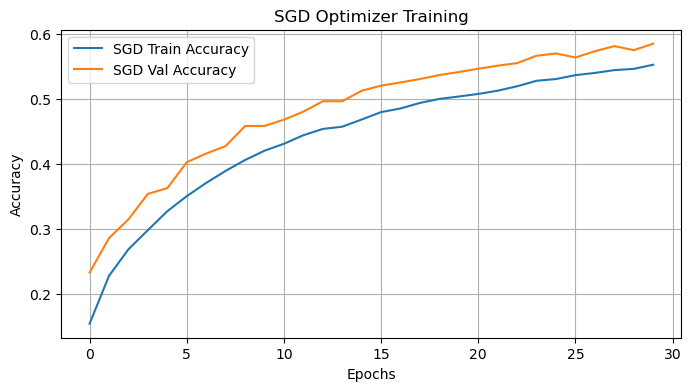

In [ ]:
# Plot SGD Training
plt.figure(figsize=(8, 4))
plt.plot(history_sgd.history['accuracy'], label='SGD Train Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Val Accuracy')
plt.title('SGD Optimizer Training')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

Comments on SGD graph:
The convergence is notably slower than Adam and RMSProp. Both training and validation accuracies gradually increase i think it requires more epochs but my cpu couldnt handle it :)

In [ ]:
#Train with RMSProp Optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9) #after training alot of rho i found out this is the best rho
model_rmsprop = build_base_model()
model_rmsprop.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128, verbose=1)
best_rmsprop = max(history_rmsprop.history['val_accuracy'])
print(f"rMSProp Best VA: {best_rmsprop:.4f}")



Training with RMSProp Optimizer...
Epoch 1/30
391/391 [==============================] - 5s 11ms/step - loss: 1.8556 - accuracy: 0.3264 - val_loss: 1.6528 - val_accuracy: 0.4247
Epoch 2/30
391/391 [==============================] - 4s 10ms/step - loss: 1.5523 - accuracy: 0.4439 - val_loss: 1.4729 - val_accuracy: 0.4901
Epoch 3/30
391/391 [==============================] - 4s 10ms/step - loss: 1.4187 - accuracy: 0.4965 - val_loss: 1.3038 - val_accuracy: 0.5487
Epoch 4/30
391/391 [==============================] - 4s 10ms/step - loss: 1.3155 - accuracy: 0.5344 - val_loss: 1.2293 - val_accuracy: 0.5821
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 1.2488 - accuracy: 0.5612 - val_loss: 1.1216 - val_accuracy: 0.6211
Epoch 6/30
391/391 [==============================] - 4s 10ms/step - loss: 1.1834 - accuracy: 0.5853 - val_loss: 1.0925 - val_accuracy: 0.6311
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 1.1312 - accuracy: 0.6036 - val_

concise explanation of hyperparameters for RMSProb
learning_rate=0.001 : is the default learning rate for RMSPROB
rho=0.9 Decay rate for moving averages of squared gradients, helping adapt the learning rate.

comments on RMSprob
Nearly identical performance (0.6991) but with less oscillation, making it a reliable choice.

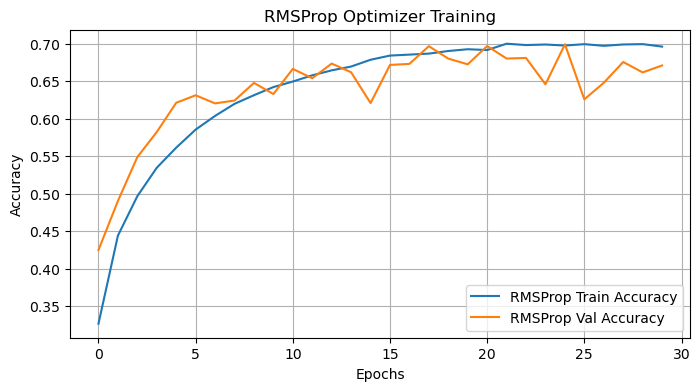

In [ ]:
# Plot RMSProp Training
plt.figure(figsize=(8, 4))
plt.plot(history_rmsprop.history['accuracy'], label='RMSProp Train Accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp Val Accuracy')
plt.title('RMSProp Optimizer Training')
plt.xlabel('epochs')
plt.ylabel('acuracy')
plt.legend()
plt.grid()
plt.show()

Comments on RMSProp graph:
This optimizer achieves comparable results to Adam, with a smooth convergence. It slightly stabilizes better around 15–20 epochs and maintains consistent performance.
Training and validation curves show that the model generalizes well with minimal overfitting.

In [ ]:
#training adam 
adam_optimizer = Adam(learning_rate=0.001, beta_1=0.818, beta_2=0.88) #after testing alot of betas i found out this is the best betas
model_adam = build_base_model()
model_adam.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=128, verbose=1)
best_adam = max(history_adam.history['val_accuracy'])
print(f"adam best VA: {best_adam:.4f}")




Epoch 1/30
391/391 [==============================] - 4s 9ms/step - loss: 1.8671 - accuracy: 0.3065 - val_loss: 1.6353 - val_accuracy: 0.4352
Epoch 2/30
391/391 [==============================] - 3s 8ms/step - loss: 1.5932 - accuracy: 0.4189 - val_loss: 1.4606 - val_accuracy: 0.4759
Epoch 3/30
391/391 [==============================] - 3s 8ms/step - loss: 1.4814 - accuracy: 0.4649 - val_loss: 1.3402 - val_accuracy: 0.5217
Epoch 4/30
391/391 [==============================] - 3s 8ms/step - loss: 1.3926 - accuracy: 0.5025 - val_loss: 1.2820 - val_accuracy: 0.5685
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 1.3166 - accuracy: 0.5337 - val_loss: 1.1783 - val_accuracy: 0.5913
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 1.2667 - accuracy: 0.5522 - val_loss: 1.1441 - val_accuracy: 0.6052
Epoch 7/30
391/391 [==============================] - 3s 8ms/step - loss: 1.2152 - accuracy: 0.5723 - val_loss: 1.1218 - val_accuracy: 0.6157
Epoch 

concise explanation of hyperparameters for ADAM
Learning Rate = 0.001: is the default adam learning rate
beta_1=0.818: Decay rate for the first moment (momentum). It influences how past gradients are accumulated.
beta_2=0.88: Decay rate for the second moment (variance). A lower value here gives more weight to recent gradient changes.


Comments on ADAM results
Achieved the best validation accuracy (0.7008), showing its suitability for fast and efficient optimization.

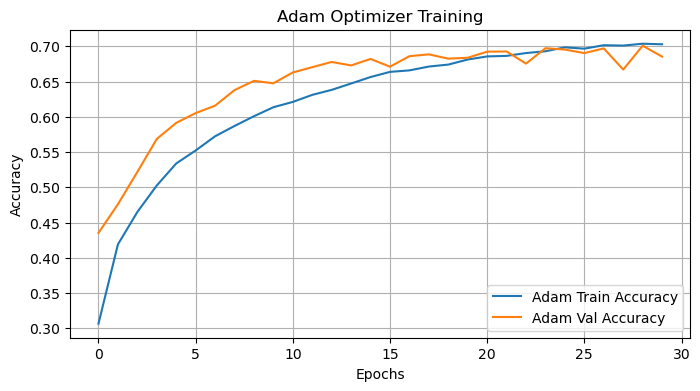

In [ ]:
# Plot Adam Training
plt.figure(figsize=(8, 4))
plt.plot(history_adam.history['accuracy'], label='adam Train Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Aaam Val Accuracy')
plt.title('adam optimizer training')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

comments on ADAM graph
The validation accuracy shows rapid improvement early in training, reaching near-maximum performance after around 10 epochs.
There is slight oscillation in accuracy after convergence, indicating a strong optimization capability but with some variance.


In [ ]:
print("\nbest validation accuracies:")
print(f"SGD: {best_sgd:.4f}")
print(f"RMSProp: {best_rmsprop:.4f}")
print(f"Adam: {best_adam:.4f}")



Best Validation Accuracies:
SGD: 0.5854
RMSProp: 0.6991
Adam: 0.7008


Surface plot only for ADAM since we are dealing with 3 variables to make a 3D plot 

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

beta1_values = np.linspace(0.8, 0.9, 5)  
beta2_values = np.linspace(0.85, 0.95, 5)  

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

test_accuracies = np.zeros((len(beta1_values), len(beta2_values)))

for i, beta1 in enumerate(beta1_values):
    for j, beta2 in enumerate(beta2_values):
        print(f"Training with Beta1: {beta1}, Beta2: {beta2}")
        optimizer = Adam(learning_rate=0.001, beta_1=beta1, beta_2=beta2)
        model = build_model()
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        with tf.device('/GPU:0'):
            model.fit(x_train, y_train, epochs=5, batch_size=1024, verbose=0)  
        _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
        test_accuracies[i, j] = test_accuracy

adam_df = pd.DataFrame({
    'beta1': np.repeat(beta1_values, len(beta2_values)),
    'beta2': np.tile(beta2_values, len(beta1_values)),
    'test_accuracy': test_accuracies.flatten()
})

adam_pivot = adam_df.pivot_table(index='beta1', columns='beta2', values='test_accuracy', fill_value=0)

fig_adam = go.Figure(
    data=[go.Surface(z=adam_pivot.to_numpy(), x=beta2_values, y=beta1_values)]
)
fig_adam.update_layout(
    title="Adam Optimizer: Beta1 vs Beta2 vs Test Accuracy",
    scene=dict(
        xaxis_title="Beta2",
        yaxis_title="Beta1",
        zaxis_title="Test Accuracy"
    ),
    template="plotly"
)

fig_adam.write_html("adam_optimizer_plot.html")





Training with Beta1: 0.8, Beta2: 0.85


/root/miniconda3/envs/ML_PROJ/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1734043584.500925    1203 service.cc:148] XLA service 0x7f435400adf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734043584.501350    1203 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-13 00:46:24.535324: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734043584.653437    1203 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-13 00:46:25.282316: I external/local_xla/xla/strea

Training with Beta1: 0.8, Beta2: 0.875
Training with Beta1: 0.8, Beta2: 0.8999999999999999
Training with Beta1: 0.8, Beta2: 0.9249999999999999
Training with Beta1: 0.8, Beta2: 0.95
Training with Beta1: 0.8250000000000001, Beta2: 0.85
Training with Beta1: 0.8250000000000001, Beta2: 0.875
Training with Beta1: 0.8250000000000001, Beta2: 0.8999999999999999
Training with Beta1: 0.8250000000000001, Beta2: 0.9249999999999999
Training with Beta1: 0.8250000000000001, Beta2: 0.95
Training with Beta1: 0.8500000000000001, Beta2: 0.85
Training with Beta1: 0.8500000000000001, Beta2: 0.875
Training with Beta1: 0.8500000000000001, Beta2: 0.8999999999999999
Training with Beta1: 0.8500000000000001, Beta2: 0.9249999999999999
Training with Beta1: 0.8500000000000001, Beta2: 0.95
Training with Beta1: 0.875, Beta2: 0.85
Training with Beta1: 0.875, Beta2: 0.875
Training with Beta1: 0.875, Beta2: 0.8999999999999999
Training with Beta1: 0.875, Beta2: 0.9249999999999999
Training with Beta1: 0.875, Beta2: 0.95
Tr